In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Dibujar modelos

In [3]:
os.chdir('..')
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

In [8]:
modelo = tf.keras.models.load_model('enconder_model/tunning_save/best_model_0.7.h5', 
                                    custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [9]:
modelo.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 24, 1)]      0           []                               
                                                                                                  
 layer_normalization_2 (LayerNo  (None, 24, 1)       2           ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_1 (MultiH  (None, 24, 1)       897         ['layer_normalization_2[0][0]',  
 eadAttention)                                                    'layer_normalization_2[0][0]']  
                                                                                            

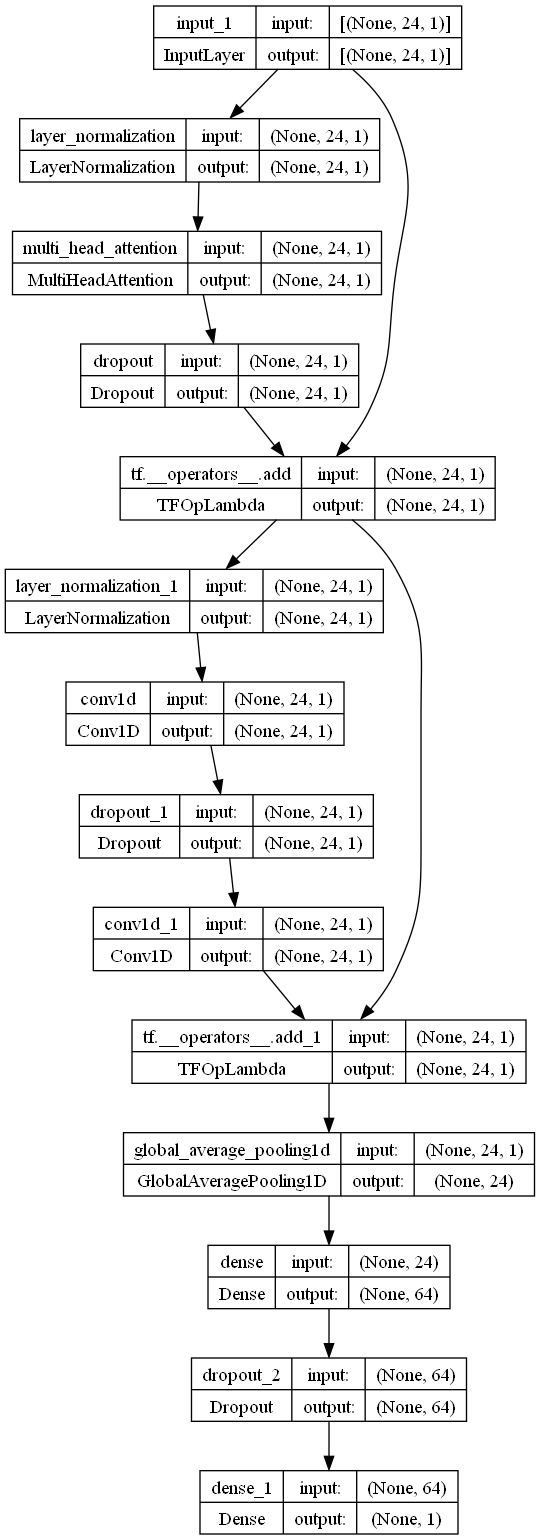

In [6]:
dot_img_file = 'enconder_model/bases_model/base.png'
tf.keras.utils.plot_model(modelo, to_file=dot_img_file, show_shapes=True)

In [7]:
pd.read_csv('enconder_model/bases_model/df_results_bases.csv')

,Unnamed: 0,trainig_size,model,type,training_time,prediction_time,rmse_trainig,rmse_validation,rmse_test,mean_MAE,r2,mean_RMSE,mean_MAPE
0,0,0.7,transformer,base,271.141982,2.467109,0.004185,0.006096,0.006988,12.678758,0.964162,30.432660,5.697695
1,1,0.8,transformer,base,301.630089,2.234354,0.004303,0.007743,0.007017,12.897844,0.964049,30.481191,5.776222
2,2,0.9,transformer,base,139.830219,1.147879,0.004751,0.004712,0.009804,18.347335,0.952890,39.530464,7.343361


In [13]:
pd.read_csv('enconder_model/tunning_save/df_results_best.csv')

,Unnamed: 0.1,Unnamed: 0,trainig_size,model,type,training_time,prediction_time,rmse_trainig,rmse_validation,rmse_test,mean_MAE,r2,mean_RMSE,mean_MAPE,architecture
0,0,0,0.7,transformer,tunning,256.998935,4.319690,0.004304,0.006191,0.007225,13.546108,0.962736,31.032234,5.899985,"[[(64, 'head_size'), (2, 'num_heads'), (1, 'ff..."
1,1,1,0.8,transformer,tunning,243.136340,2.414063,0.004216,0.007718,0.006872,12.075787,0.964701,30.203517,5.314426,"[[(32, 'head_size'), (2, 'num_heads'), (3, 'ff..."
2,2,2,0.9,transformer,tunning,281.724012,1.630778,0.004680,0.004425,0.009348,16.367750,0.953912,39.099295,6.595585,"[[(128, 'head_size'), (1, 'num_heads'), (3, 'f..."
